In [46]:
import numpy as np


In [47]:
from scipy.stats import multivariate_normal as mvn
from scipy.stats import norm
from scipy import optimize

In [48]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
%matplotlib notebook

# Exercise 1

## I. Compute the price once

In [49]:
K = 0.6 #[0.6, 0.8, 1, 1.2]
tau = 2 #[2, 5, 7, 9]
T = 10
D = 50
V0 = 100
sigma = 0.4
r = 0.05

In [50]:
def N2(a,b,rho):
    mean = np.array([0,0])
    covariance = np.array([[1, rho],[rho, 1]])
    dist = mvn(mean=mean, cov=covariance)
    return dist.cdf(np.array([a,b]))

def N(x):
    return norm.cdf(x)

In [51]:
# The compound option will be exercised iff:
# The option is worth K 

def Call_price_minus_K(v):
    dplus = ( np.log( v/D ) + (r+sigma**2/2) * (T-tau) ) / ( sigma * np.sqrt(T-tau) )
    dminus = ( np.log( v/D ) + (r-sigma**2/2) * (T-tau) ) / ( sigma * np.sqrt(T-tau) )
    return v * N(dplus) - D * N(dminus) * np.exp(-r * (T-tau)) - K

sol = optimize.root_scalar(Call_price_minus_K, bracket=[1, 200], method='brentq')
Vstar = sol.root
if not sol.converged: 
    raise Exception('The optimization did not converge')
        
a1 = ( np.log( V0/ Vstar ) + ( r + sigma**2/2 ) * tau ) / ( sigma * np.sqrt(tau) )
a2 = a1 - sigma * np.sqrt( tau )

b1 =  ( np.log( V0/ D ) + ( r + sigma**2/2 ) * T ) / ( sigma * np.sqrt(T) )
b2 = b1 - sigma * np.sqrt( T )

C = V0 * N2(a1, b1, np.sqrt( tau/T ) ) \
    - D * np.exp( - r * T ) * N2(a2, b2, np.sqrt( tau/T )) \
    - np.exp( - r * tau ) * K * N( a2 )

print('Vstar: '+str(Vstar)+' C: '+str(C) )

Vstar: 7.058373740490534 C: 74.83865630937639


In [52]:
# compute the implied volatility:
def option_price_with_vol(sigma_):
    global C
    dplus = ( np.log( V0/D ) + (r+sigma_**2/2) * (T-tau) ) / ( sigma_ * np.sqrt(T-tau) )
    dminus = ( np.log( V0/D ) + (r-sigma_**2/2) * (T-tau) ) / ( sigma_ * np.sqrt(T-tau) )
    return V0 * N(dplus) - D * N(dminus) * np.exp( -r * (T-tau)) - C

sol = optimize.root_scalar(option_price_with_vol, bracket=[0.0001, 2], method='brentq')
implied_vol = sol.root
if not sol.converged: 
    raise Exception('The optimization did not converge')
    
print('implied vol: '+ str(implied_vol) )

implied vol: 0.4845833136983299


## II. Compute the price as a function of K and tau:

In [53]:
# Let's define a function to compute for different values of K and tau:

def compute(K, tau):
    T = 10
    D = 50
    V0 = 100
    sigma = 0.4
    r = 0.05
    
    def N2(a,b,rho):
        mean = np.array([0,0])
        covariance = np.array([[1, rho],[rho, 1]])
        dist = mvn(mean=mean, cov=covariance)
        return dist.cdf(np.array([a,b]))

    def N(x):
        return norm.cdf(x)



    def Call_price_minus_K(v):
        dplus = ( np.log( v/D ) + (r+sigma**2/2) * (T-tau) ) / ( sigma * np.sqrt(T-tau) )
        dminus = ( np.log( v/D ) + (r-sigma**2/2) * (T-tau) ) / ( sigma * np.sqrt(T-tau) )
        return v * N(dplus) - D * N(dminus) * np.exp(-r * (T-tau)) - K

    sol = optimize.root_scalar(Call_price_minus_K, bracket=[1, 200], method='brentq')
    Vstar = sol.root
    if not sol.converged: 
        raise Exception('The optimization did not converge')

    a1 = ( np.log( V0/ Vstar ) + ( r + sigma**2/2 ) * tau ) / ( sigma * np.sqrt(tau) )
    a2 = a1 - sigma * np.sqrt( tau )

    b1 =  ( np.log( V0/ D ) + ( r + sigma**2/2 ) * T ) / ( sigma * np.sqrt(T) )
    b2 = b1 - sigma * np.sqrt( T )

    C = V0 * N2(a1, b1, np.sqrt( tau/T ) ) \
        - D * np.exp( - r * T ) * N2(a2, b2, np.sqrt( tau/T )) \
        - np.exp( - r * tau ) * K * N( a2 )
    
    
    def option_price_with_vol(sigma_):
        dplus = ( np.log( V0/D ) + (r+sigma_**2/2) * (T-tau) ) / ( sigma_ * np.sqrt(T-tau) )
        dminus = ( np.log( V0/D ) + (r-sigma_**2/2) * (T-tau) ) / ( sigma_ * np.sqrt(T-tau) )
        return V0 * N(dplus) - D * N(dminus) * np.exp( -r * (T-tau)) - C

    sol = optimize.root_scalar(option_price_with_vol, bracket=[0.0001, 2], method='brentq')
    implied_vol = sol.root
    if not sol.converged: 
        raise Exception('The optimization did not converge')
    
    
    return implied_vol

In [54]:
for K in [0.6, 0.8, 1, 1.2]:
    for tau in [2, 5, 7, 9]:
        print(compute(K, tau))

0.4845833136983299
0.6972027272598683
0.9621131020842989
1.7655167446085707
0.47976378415300014
0.6927089053245818
0.95745561563845
1.759588125844489
0.4749351280306966
0.6882372399122371
0.9528529712106832
1.753751308298117
0.4700961258696247
0.6837871592423744
0.9482999154699511
1.7479934604527025


In [55]:
computev = np.vectorize(compute)

<IPython.core.display.Javascript object>


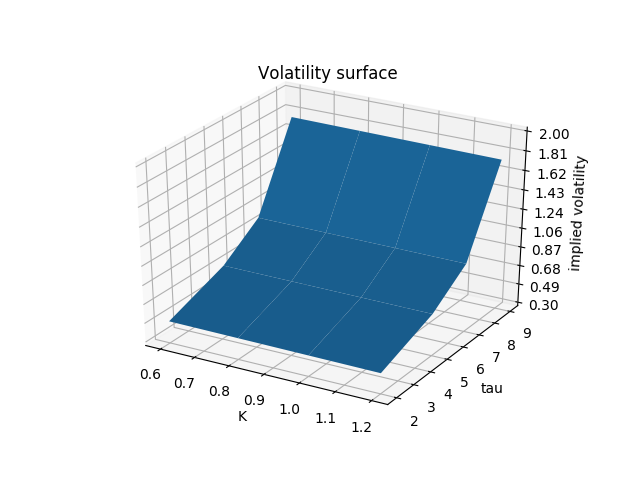

In [56]:

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X =  [ 0.6, 0.8, 1, 1.2] # K
Y  = [2, 5, 7, 9]     # tau
X, Y = np.meshgrid(X, Y)
Z = computev(X,Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z,
                       linewidth=0)

# Customize the z axis.
ax.set_zlim(0.3, 2)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('K')
ax.set_ylabel('tau')
ax.set_zlabel('implied volatility')
plt.title('Volatility surface')
plt.show()


<IPython.core.display.Javascript object>


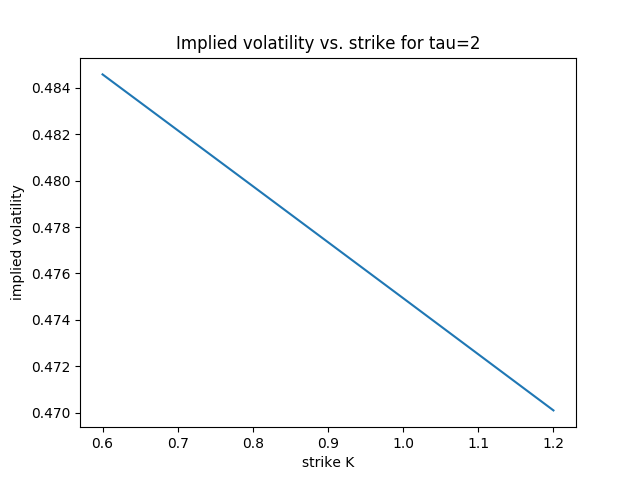

<IPython.core.display.Javascript object>


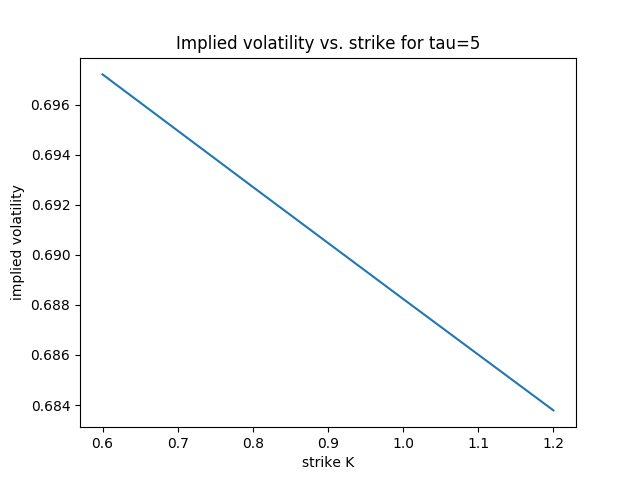

<IPython.core.display.Javascript object>


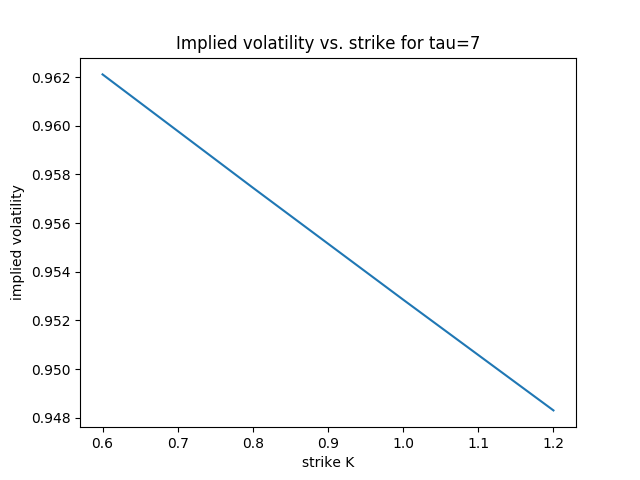

<IPython.core.display.Javascript object>


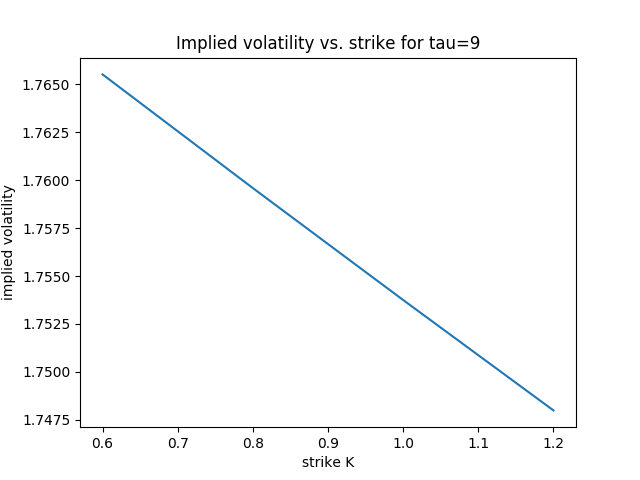

In [59]:
#For every maturity τ, plot the implied volatility as a function of strike
X = [ 0.6, 0.8, 1, 1.2]
for tau in [2, 5, 7, 9]:
    plt.figure()
    Y = computev(X, tau)
    plt.plot(X, Y)
    plt.xlabel('strike K')
    plt.ylabel('implied volatility')
    plt.title('Implied volatility vs. strike for tau='+str(tau))
    plt.show()